In [1]:
# Import all the required libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all Data using pandas:

observation =  pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
# Observation DataFrame:
observation.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [4]:
# The Species DataFrame:

species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [5]:
# Find the information about the data
observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


- From above we can get that the observation data frame has 23296 entries and species DataFrame has 5824 entries

## Data Cleaning :


In [7]:
# Lets check the data types for both the dataframes

observation.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [8]:
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [9]:
type('wer')

str

In [10]:
# Lets see the missing/NAN data in Observation DataFrame:

observation.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [11]:
# Lets see the NAN data in Species DataFrame:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [12]:
# Lets see which category has more missing value for conservation_status.

pd.crosstab(species['category'],species['conservation_status'].isnull(),rownames=['Specie'],colnames=['if_status is there'])

if_status is there,False,True
Specie,,
Amphibian,7,73
Bird,79,442
Fish,11,116
Mammal,38,176
Nonvascular Plant,5,328
Reptile,5,74
Vascular Plant,46,4424


- We observe that there are certain NAN entries in the conservation_status column of species Data Frame. Most of the Vascular plant species data is NAN. We also see that the datatype of the this column is of string. We can replace all these NAN with 'Unavailable' string.

In [13]:

species['conservation_status'] = species['conservation_status'].fillna(value = 'Unavailable')

In [14]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Unavailable
1,Mammal,Bos bison,"American Bison, Bison",Unavailable
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Unavailable
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Unavailable
4,Mammal,Cervus elaphus,Wapiti Or Elk,Unavailable
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Unavailable
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Unavailable
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


## Data Visualization and Analysis

In [15]:
# lets count the number of different unique values that are there in the data
observation.nunique()

scientific_name    5541
park_name             4
observations        304
dtype: int64

In [16]:
species.conservation_status.unique()

array(['Unavailable', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [17]:
print(species['conservation_status'].value_counts())

conservation_status
Unavailable           5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


/home/kritika/miniconda3/envs/MLearn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kritika/miniconda3/envs/MLearn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kritika/miniconda3/envs/MLearn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

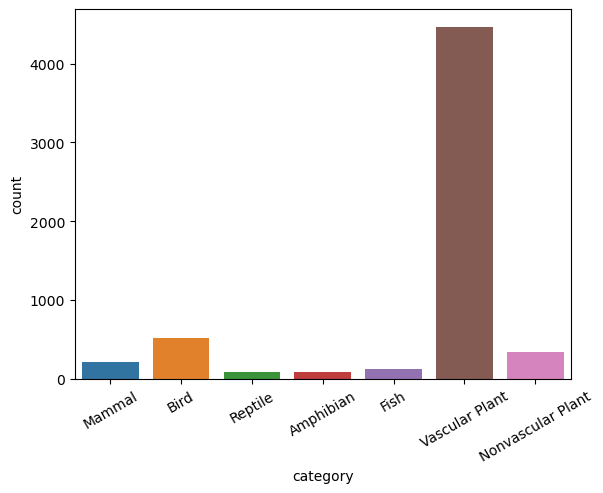

In [18]:
sns.countplot(x='category',data = species)
plt.xticks(rotation=30)

- We observe that there are more number of vascular plant species. However its a little hard to investigate the difference in animal species so lets just take a look at the only animal species. 

/home/kritika/miniconda3/envs/MLearn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kritika/miniconda3/envs/MLearn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Reptile'),
  Text(1, 0, 'Amphibian'),
  Text(2, 0, 'Fish'),
  Text(3, 0, 'Mammal'),
  Text(4, 0, 'Bird')])

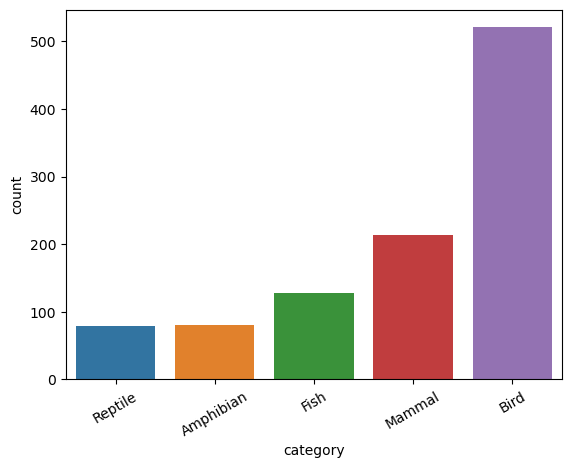

In [19]:
animal_category = species['category'].unique()[:-2]
animal_data = species[species.category.isin(animal_category)]

sns.countplot(x='category',data = animal_data,order=animal_data['category'].value_counts(ascending=True).index)
plt.xticks(rotation=30)

- We find that there are more bird species in the parks and reptiles species are lowest

In [20]:
# Lets see how many unique bird species are there overall:

number_of_unique_birds = animal_data[animal_data['category']== 'Bird'].common_names.nunique()
number_of_unique_reptiles = animal_data[animal_data['category']== 'Reptile'].common_names.nunique()

print('There are {} number of unique birds'.format(number_of_unique_birds))
print('There are {} number of unique reptiles'.format(number_of_unique_reptiles))

There are 481 number of unique birds
There are 79 number of unique reptiles


For our further analysis we can see that we can combine both dataframes to get some insights on observations and species in particular parks 

In [21]:
species.scientific_name.nunique()

5541

In [22]:
observation.scientific_name.nunique()

5541

- Both the dataframes have same number of unique scientific name.


In [23]:
# Merge the data frames . they automatically merge on common data column 'scientific_name'

biodiv = pd.merge(species,observation)

In [24]:
biodiv.head(6)

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Unavailable,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Unavailable,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Unavailable,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Unavailable,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Unavailable,Yosemite National Park,128
5,Mammal,Bos bison,"American Bison, Bison",Unavailable,Yellowstone National Park,269


- Now since we observed that there are many birds species, we can compare observation between all parks

In [25]:
bird_data = biodiv[biodiv['category'] == 'Bird']
bird_data[bird_data.observations == bird_data.observations.max()]

,category,scientific_name,common_names,conservation_status,park_name,observations
20804,Bird,Spinus lawrencei,Lawrence's Goldfinch,Unavailable,Yellowstone National Park,305


In [26]:
bird_data[bird_data['park_name']=='Yellowstone National Park']

,category,scientific_name,common_names,conservation_status,park_name,observations
738,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Unavailable,Yellowstone National Park,259
742,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Yellowstone National Park,245
745,Bird,Accipiter gentilis,Northern Goshawk,Unavailable,Yellowstone National Park,232
749,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern,Yellowstone National Park,200
752,Bird,Aquila chrysaetos,Golden Eagle,Species of Concern,Yellowstone National Park,183
...,...,...,...,...,...,...
20896,Bird,Melanerpes formicivorus,Acorn Woodpecker,Unavailable,Yellowstone National Park,246
20903,Bird,Picoides nuttallii,Nuttall's Woodpecker,Unavailable,Yellowstone National Park,239
20906,Bird,Sphyrapicus ruber,Red-Breasted Sapsucker,Unavailable,Yellowstone National Park,229
20909,Bird,Otus flammeolus,Flammulated Owl,Unavailable,Yellowstone National Park,283


- The highest observation of Bird category is of a bird commonly named as 'Lawrence's Goldfinch' at 'Yellowstone National Park'


## Endangered_Species

Let see the data for the species which are endangered. 

In [27]:
endangered_species_data = biodiv[biodiv['conservation_status']=='Endangered']
endangered_species_data.head(10)

,category,scientific_name,common_names,conservation_status,park_name,observations
68,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35
69,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,27
70,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,29
71,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,74
72,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,15
73,Mammal,Canis lupus,Gray Wolf,Endangered,Yellowstone National Park,60
74,Mammal,Canis lupus,Gray Wolf,Endangered,Yellowstone National Park,67
75,Mammal,Canis lupus,Gray Wolf,Endangered,Yellowstone National Park,203
76,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,14
77,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,117


/home/kritika/miniconda3/envs/MLearn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kritika/miniconda3/envs/MLearn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Vascular Plant'),
  Text(1, 0, 'Amphibian'),
  Text(2, 0, 'Fish'),
  Text(3, 0, 'Bird'),
  Text(4, 0, 'Mammal')])

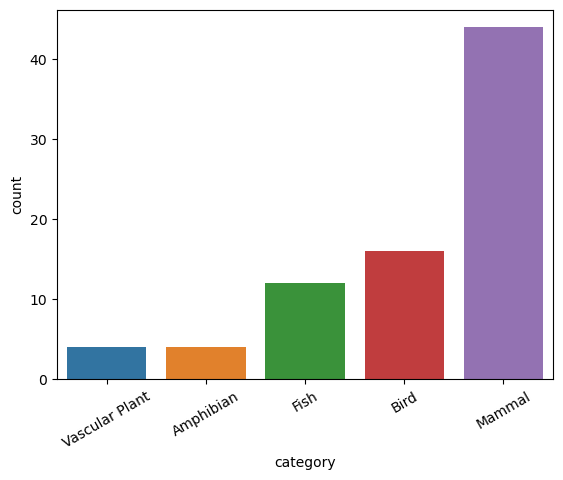

In [28]:
# We make a plot to check which category is the most endangered 

sns.countplot(x='category',data = endangered_species_data,order = endangered_species_data['category'].value_counts(ascending=True).index)
plt.xticks(rotation=30)

In [29]:
# names of endangered mammals :

endangered_species_data[endangered_species_data['category'] =='Mammal'].common_names.unique()

array(['Gray Wolf', 'Gray Wolf, Wolf', 'Red Wolf', 'Gray Myotis',
       'Indiana Bat, Indiana Or Social Myotis',
       'Carolina Northern Flying Squirrel, Northern Flying Squirrel',
       'Sierra Nevada Bighorn Sheep'], dtype=object)

In [30]:
# Which park has the highest number of observations and which mammal is seen mostly!

endangered_species_data[endangered_species_data['observations'] == endangered_species_data['observations'].max()]

,category,scientific_name,common_names,conservation_status,park_name,observations
75,Mammal,Canis lupus,Gray Wolf,Endangered,Yellowstone National Park,203
99,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,Yellowstone National Park,203


- So its best to visit 'Yellowstone National Park' as we can get a chance to see the one of the most endangered mammals! 
